In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=np.float32)
y = np.array([[0], [1], [1], [0]], dtype=np.float32)

In [4]:
for i in range(len(X)):
  print(f"{int(X[i][0])}  {int(X[i][1])}  {int(y[i][0])}")

0  0  0
0  1  1
1  0  1
1  1  0


In [5]:
from tensorflow import keras
from tensorflow.keras import layers

In [6]:
keras_model = keras.Sequential([
layers.Dense(4, activation='relu', input_shape=(2,)),
layers.Dense(1, activation='sigmoid')
])
keras_model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
history_keras = keras_model.fit(
    X, y,
    epochs=1000,
    verbose=0
)

In [9]:
predictions_keras = keras_model.predict(X, verbose=0)
print("\nKeras Predictions:")
for i in range(len(X)):
    pred = predictions_keras[i][0]


Keras Predictions:


In [10]:
 print(f"Input: {X[i]} → Prediction: {pred:.4f} → Rounded: {int(pred > 0.5)}")

print(f"\nFinal Loss: {history_keras.history['loss'][-1]:.4f}")
print(f"Final Accuracy: {history_keras.history['accuracy'][-1]:.4f}")


Input: [1. 1.] → Prediction: 0.5027 → Rounded: 1

Final Loss: 0.6932
Final Accuracy: 0.2500


In [11]:
import torch
import torch.nn as nn
import torch.optim as optim

In [12]:
X_torch = torch.FloatTensor(X)
y_torch = torch.FloatTensor(y)

In [13]:
class XOR_MLP(nn.Module):
    def __init__(self):
        super(XOR_MLP, self).__init__()
        self.hidden = nn.Linear(2, 4)
        self.output = nn.Linear(4, 1)

    def forward(self, x):
        x = torch.relu(self.hidden(x))
        x = torch.sigmoid(self.output(x))
        return x

pytorch_model = XOR_MLP()

In [14]:
criterion = nn.BCELoss()
optimizer = optim.Adam(pytorch_model.parameters(), lr=0.01)

In [15]:
losses_pytorch = []
for epoch in range(1000):

    outputs = pytorch_model(X_torch)
    loss = criterion(outputs, y_torch)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    losses_pytorch.append(loss.item())

In [16]:
with torch.no_grad():
    predictions_pytorch = pytorch_model(X_torch).numpy()

print("\nPyTorch Predictions:")
for i in range(len(X)):
    pred = predictions_pytorch[i][0]
    print(f"Input: {X[i]} → Prediction: {pred:.4f} → Rounded: {int(pred
> 0.5)}")

print(f"\nFinal Loss: {losses_pytorch[-1]:.4f}")


PyTorch Predictions:
Input: [0. 0.] → Prediction: 0.0042 → Rounded: 0
Input: [0. 1.] → Prediction: 0.9981 → Rounded: 1
Input: [1. 0.] → Prediction: 0.9977 → Rounded: 1
Input: [1. 1.] → Prediction: 0.0042 → Rounded: 0

Final Loss: 0.0032


In [17]:
import tensorflow as tf

In [18]:
X_tf = tf.constant(X)
y_tf = tf.constant(y)

In [19]:
W1 = tf.Variable(tf.random.normal([2, 4]), dtype=tf.float32)
b1 = tf.Variable(tf.zeros([4]), dtype=tf.float32)
W2 = tf.Variable(tf.random.normal([4, 1]), dtype=tf.float32)
b2 = tf.Variable(tf.zeros([1]), dtype=tf.float32)

In [20]:
def tf_model(x):
    hidden = tf.nn.relu(tf.matmul(x, W1) + b1)
    output = tf.nn.sigmoid(tf.matmul(hidden, W2) + b2)
    return output

In [21]:
def compute_loss(y_true, y_pred):
    return tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(
            labels=y_true,
            logits=tf.math.log(y_pred / (1 - y_pred + 1e-7))
        )
    )

In [22]:
optimizer_tf = tf.optimizers.Adam(learning_rate=0.01)

In [23]:
losses_tf = []
for epoch in range(1000):
    with tf.GradientTape() as tape:
        predictions = tf_model(X_tf)
        loss = compute_loss(y_tf, predictions)

    gradients = tape.gradient(loss, [W1, b1, W2, b2])
    optimizer_tf.apply_gradients(zip(gradients, [W1, b1, W2, b2]))
    losses_tf.append(loss.numpy())

In [24]:
predictions_tf = tf_model(X_tf).numpy()

print("\nTensorFlow Predictions:")
for i in range(len(X)):
    pred = predictions_tf[i][0]
    print(f"Input: {X[i]} → Prediction: {pred:.4f} → Rounded: {int(pred > 0.5)}")

print(f"\nFinal Loss: {losses_tf[-1]:.4f}")


TensorFlow Predictions:
Input: [0. 0.] → Prediction: 0.0239 → Rounded: 0
Input: [0. 1.] → Prediction: 0.9946 → Rounded: 1
Input: [1. 0.] → Prediction: 0.9941 → Rounded: 1
Input: [1. 1.] → Prediction: 0.0041 → Rounded: 0

Final Loss: 0.0099


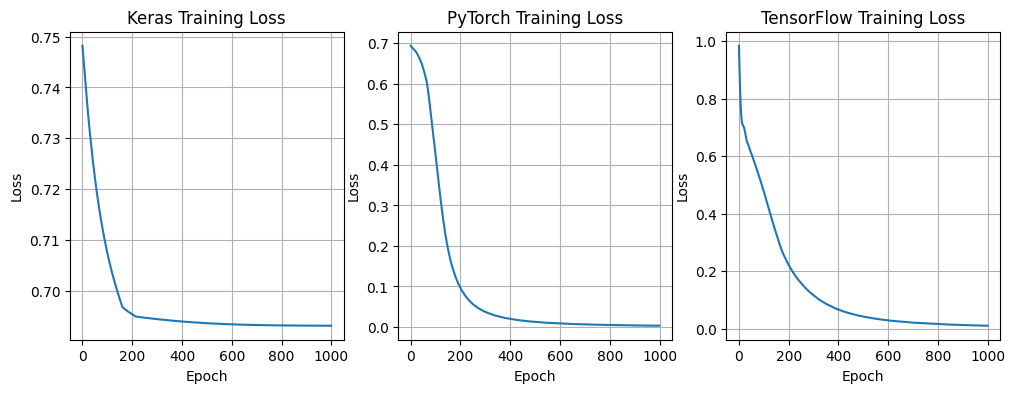

In [25]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.plot(history_keras.history['loss'])
plt.title('Keras Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)

plt.subplot(1, 3, 2)
plt.plot(losses_pytorch)
plt.title('PyTorch Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)

plt.subplot(1, 3, 3)
plt.plot(losses_tf)
plt.title('TensorFlow Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)